## Quiz 8 Answers

In [1]:
# Working with data:
import numpy  as np                                   # For scientific computing.
import pandas as pd                                   # Working with tables.

# Specific data providers:
from tiingo import TiingoClient                       # Stock prices.
import quandl                                         # Economic data, futures prices, ...

# API keys:
tiingo = TiingoClient({'api_key':'XXXX'})
quandl.ApiConfig.api_key = 'YYYY'

# Plotting:
import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice

Q1: 

In [2]:
# initial leverage
value_in_stocks = 280
value_in_cash = - 80
portfolio_value = value_in_stocks + value_in_cash
leverage = value_in_stocks / portfolio_value
print(value_in_stocks, value_in_cash, portfolio_value, leverage)

280 -80 200 1.4


In [3]:
# leverage one year later:
value_in_stocks = 280 * 1.2
value_in_cash = - 80 * 1.02
portfolio_value = value_in_stocks + value_in_cash
leverage = value_in_stocks / portfolio_value
print(value_in_stocks, value_in_cash, portfolio_value, leverage)

336.0 -81.6 254.4 1.320754716981132


Q2: 

In [4]:
# initial leverage
value_in_stocks = 600
value_in_cash = - 100
portfolio_value = value_in_stocks + value_in_cash
leverage = value_in_stocks / portfolio_value
print(portfolio_value, leverage)

500 1.2


In [5]:
# before rebalancing
value_in_stocks = 600 * 1.3
value_in_cash = - 100 * 1.01
portfolio_value = value_in_stocks + value_in_cash
leverage = value_in_stocks / portfolio_value
print(value_in_stocks, value_in_cash, portfolio_value, leverage)

780.0 -101.0 679.0 1.1487481590574373


In [6]:
# after rebalancing
new_value_in_stocks = portfolio_value * 1.2
new_value_in_cash = - portfolio_value * 0.2
trade = new_value_in_stocks - value_in_stocks
new_leverage = new_value_in_stocks / portfolio_value
print(new_value_in_stocks, new_value_in_cash, trade, new_leverage)

814.8 -135.8 34.799999999999955 1.2


Q3:

In [7]:
PRICE       = tiingo.get_dataframe(['QQQ'],'1900-01-01', metric_name='adjClose')
PRICE.index = pd.to_datetime(PRICE.index).tz_convert(None)

QQQ   -0.829711
dtype: float64

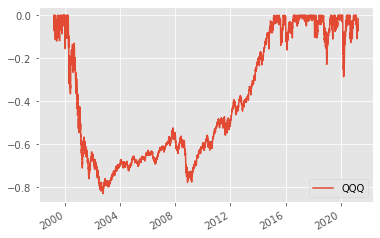

In [8]:
hwm = PRICE.cummax() 

drawdown = PRICE/hwm - 1.0   # % portfolio loss relative to most recent peak (high water mark)
drawdown.plot()
drawdown.min()

Q4:

<AxesSubplot:>

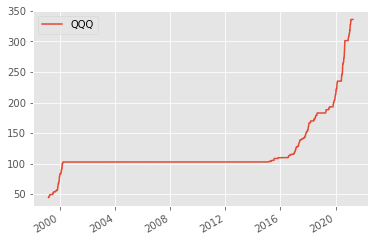

In [9]:
hwm.plot()

In [10]:
# Value of high water mark
hwm.loc['2008'][:1]

,QQQ
2008-01-02,102.519422


In [11]:
# dates before year-2000 peak
hwm[hwm.QQQ<102.519422][:'2008']

,QQQ
1999-03-10,44.427984
1999-03-11,44.645555
1999-03-12,44.645555
1999-03-15,44.819612
1999-03-16,45.211239
...,...
2000-03-20,100.082628
2000-03-21,100.082628
2000-03-22,100.082628
2000-03-23,100.952911


In [12]:
# Dates where price rebounded past year-2000 peak
PRICE[PRICE.QQQ>102.519422]['2008':]

,QQQ
2015-02-20,102.566490
2015-02-23,102.670561
2015-02-24,102.746249
2015-02-26,103.011156
2015-02-27,102.557029
...,...
2021-03-29,315.910000
2021-03-30,314.320000
2021-03-31,319.130000
2021-04-01,324.570000


<AxesSubplot:>

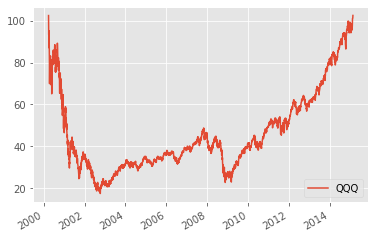

In [13]:
# from year-2000 peak to rebound
PRICE['2000-03-24':'2015-02-20'][1:].plot()

In [14]:
# number of days
len(PRICE['2000-03-24':'2015-02-20'][1:])

3749

Q5: 

In [15]:
RET = PRICE.pct_change()

fedfunds = quandl.get(['FRED/FEDFUNDS']).rename(columns={'FRED/FEDFUNDS - Value':'Fedfunds'}) / 100 / 252
fedfunds[-3:]

RET = RET.join(fedfunds, how='outer')
RET['Fedfunds']   = RET.Fedfunds.ffill()
RET['MarginRate'] = RET.Fedfunds + 0.01/252
RET = RET.dropna()

<AxesSubplot:>

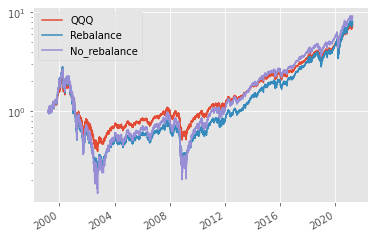

In [16]:
weights = pd.Series({'QQQ':1.3, 'MarginRate':-0.3})

t = pd.DataFrame()
t['QQQ']          = RET.QQQ.add(1).cumprod()
t['Rebalance']    = RET.multiply(weights).sum('columns').add(1).cumprod()
t['No_rebalance'] = RET.add(1).cumprod().multiply(weights).sum('columns')

t.plot(logy=True)

In [17]:
t[:'2021-3-31'].Rebalance * 1000

1999-03-11    1006.297141
1999-03-12     974.351655
1999-03-15    1010.980623
1999-03-16    1022.394651
1999-03-17    1012.090149
                 ...     
2021-03-25    7467.098350
2021-03-26    7612.613211
2021-03-29    7609.697646
2021-03-30    7559.810441
2021-03-31    7710.107038
Name: Rebalance, Length: 5551, dtype: float64

Q6:

In [18]:
portfolio_value = t.Rebalance[:'2008'][-1:] * 1000
stock = portfolio_value * 1.3 
cash = - portfolio_value * 0.3
print(portfolio_value, stock, cash)

2008-12-31    354.475828
Name: Rebalance, dtype: float64 2008-12-31    460.818577
Name: Rebalance, dtype: float64 2008-12-31   -106.342748
Name: Rebalance, dtype: float64


Q7:

In [19]:
RET.add(1).cumprod().multiply(weights)[:'2008'][-1:] * 1000  # MarginRate

,Fedfunds,MarginRate,QQQ
2008-12-31,NaN,-462.22337,774.939746


Q8:   

2002-10-09    3.459308
2002-10-07    3.415815
2002-10-08    3.400442
dtype: float64

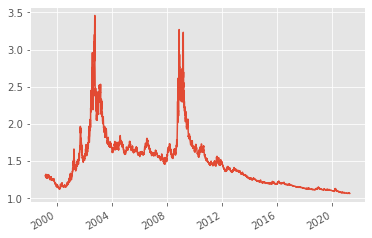

In [20]:
positions = RET.add(1).cumprod().multiply(weights)
(positions.QQQ / positions.sum('columns')).plot()
(positions.QQQ / positions.sum('columns')).nlargest(3)

Q10:

<AxesSubplot:>

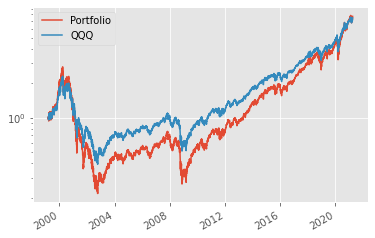

In [21]:
def get_rebalance_dates(frequency):
    group = getattr(PRICE.index, frequency) 
    return PRICE[:1].index.union(PRICE.groupby([PRICE.index.year, group]).tail(1).index)



def run_backtest(frequency):   

    weights = pd.Series({'QQQ':1.3, 'MarginRate':-0.3})
    
    rebalance_dates = get_rebalance_dates(frequency) 

    portfolio_value = pd.Series(1,                        index=[rebalance_dates[0]])    
    leverage        = pd.Series(weights.QQQ,              index=[rebalance_dates[0]])
    trades          = pd.DataFrame(columns=weights.index, index=[rebalance_dates[0]])
    previous_positions = weights
    
    for i in range(len(rebalance_dates)-1):
        start_date = rebalance_dates[i]
        end_date   = rebalance_dates[i+1]

        cum_ret = RET[start_date:end_date][1:].add(1).cumprod()
        
        new_positions = portfolio_value.iloc[-1] * weights     

        start_to_end_positions = new_positions  * cum_ret

        portfolio_value = portfolio_value.append(start_to_end_positions.sum('columns'))                  
        leverage = leverage.append(start_to_end_positions.QQQ / start_to_end_positions.sum('columns'))                  
                
        trades.loc[start_date] = new_positions - previous_positions 
        previous_positions     = start_to_end_positions.iloc[-1]      # Previous positions for the next rebalance round

    return portfolio_value, leverage, trades


portfolio_value, leverage, trades = run_backtest('quarter')

portfolio_value.to_frame('Portfolio').join(RET.QQQ.add(1).cumprod()).plot(logy=True)

<AxesSubplot:>

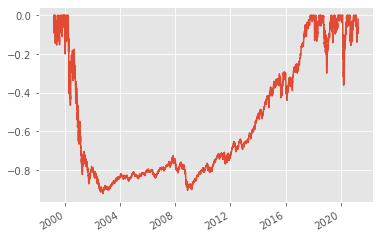

In [22]:
hwm = portfolio_value.cummax()
(portfolio_value/hwm - 1).plot()

In [23]:
(portfolio_value/hwm - 1).nsmallest(3)

2002-10-09   -0.921745
2002-10-07   -0.921227
2002-10-08   -0.921025
dtype: float64